In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "/content/HR_comma_sep (2).csv"
df = pd.read_csv(file_path)

# Encode categorical variables
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)  # One-hot encoding for Department

# Encode salary as ordinal values (low=0, medium=1, high=2)
salary_mapping = {"low": 0, "medium": 1, "high": 2}
df_encoded["salary"] = df_encoded["salary"].map(salary_mapping)

# Define features and target
X = df_encoded.drop(columns=["left"])  # Features
y = df_encoded["left"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 0.7887


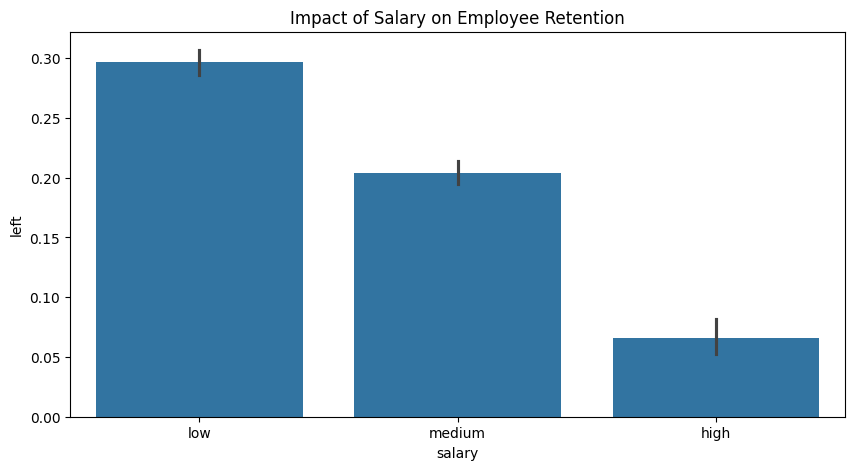

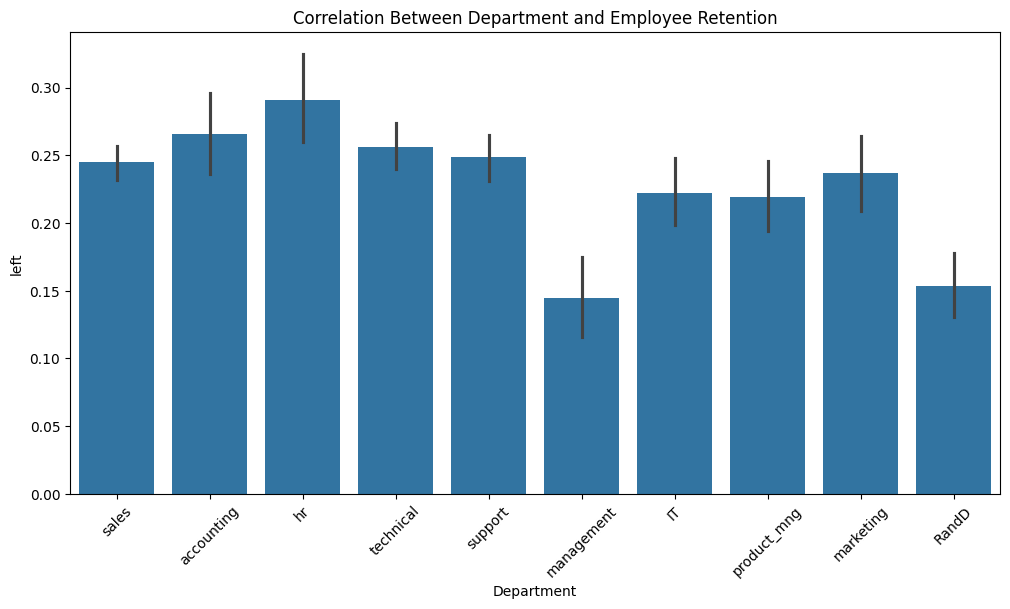

Logistic Regression Model Accuracy: 0.7647


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "/content/HR_comma_sep (2).csv"
df = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
sns.barplot(x='salary', y='left', data=df)
plt.title("Impact of Salary on Employee Retention")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Department', y='left', data=df)
plt.xticks(rotation=45)
plt.title("Correlation Between Department and Employee Retention")
plt.show()

# Encode categorical variables
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)  # One-hot encoding for Department

# Encode salary as ordinal values (low=0, medium=1, high=2)
salary_mapping = {"low": 0, "medium": 1, "high": 2}
df_encoded["salary"] = df_encoded["salary"].map(salary_mapping)

# Select key features based on EDA
selected_features = ["satisfaction_level", "time_spend_company", "number_project", "average_montly_hours", "salary"]
X = df_encoded[selected_features]  # Features
y = df_encoded["left"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")


Logistic Regression Model Accuracy: 0.9524


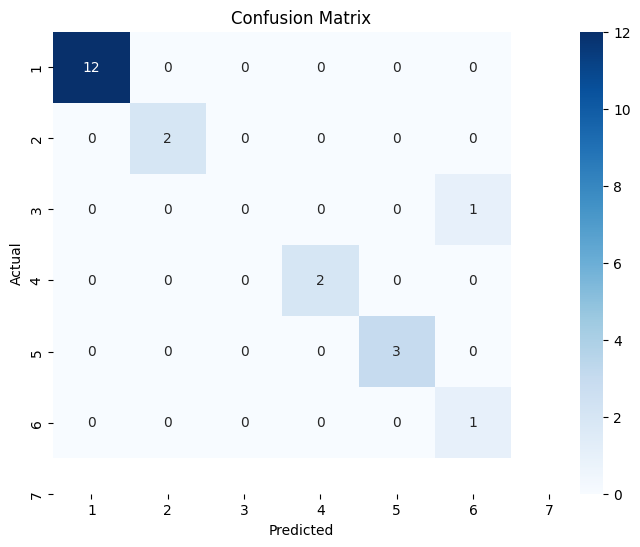

Logistic Regression Model Accuracy: 0.9524


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the datasets
zoo_data_path = "/content/zoo-data (2).csv"
class_type_path = "/content/zoo-class-type (2).csv"

zoo_df = pd.read_csv(zoo_data_path)
class_df = pd.read_csv(class_type_path)

# Merge datasets based on class_type
class_mapping = class_df[['Class_Number', 'Class_Type']].set_index('Class_Number')['Class_Type'].to_dict()
zoo_df['class_label'] = zoo_df['class_type'].map(class_mapping)

# Define features and target
X = zoo_df.drop(columns=['animal_name', 'class_type', 'class_label'])  # Features
y = zoo_df['class_type']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
